In [1]:
#Versão 1.0 - 26/10/2022 -
#Analista : Vinícius Brum
#Departamento > Análista de dados e BI
#Status: Em Desenvolvimento

# Contexto

Os dados fazem parte de uma empresa de varejo, a qual pretende entender melhor seus KPI e seu faturamento no ultimo ano.
A empresa deseja entender como está sua saúde, quais são os melhores produtos, quem são os melhores clientes.

Como fim da análise, queremos encontrar um publico mais assertivo para uma futura campanha de marketing, encontrar clientes similiares com nossos TOP X clientes

Temos 4 bases de dados brutos para efetuar as análises e chegar a uma conclusão

# Sumário

1) [Bibliotecas](#cell1) <br>
2) [Importando Dados](#cell2)<br>
3) [Exploração dos Dados](#cell3)<br>
4) [Limpeza dos Dados](#cell4)<br>
5) [Formação do DataFrame](#cell5)<br>
6)[Análises e Perguntas](#cell6)<br>
7)[Conclusão e Resultados](#cell7)<br>

# 0. Importando Bibliotecas <a id="cell1"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
import math
import plotly_express as px
from functools import reduce

#datas
import datetime as dt
import time
from datetime import date
from datetime import datetime,date,time

%matplotlib inline

In [3]:
#Estilo Grafico
plt.style.use('seaborn-whitegrid')

# 1. Importando Dados <a id="cell2"></a>

In [4]:
transacao = pd.read_excel("Exercicio_Python_CRM.xlsx", sheet_name=1)
produto = pd.read_excel("Exercicio_Python_CRM.xlsx", sheet_name=2)
lojas = pd.read_excel("Exercicio_Python_CRM.xlsx", sheet_name=3)
clientes = pd.read_excel("Exercicio_Python_CRM.xlsx", sheet_name=4)
#Dados sem filtragem e sem manipulação             

# 2. Exploração Dos Dados <a id="cell3"></a>

## Tabela Transação

In [5]:
transacao.head()

,ID_Trans,Data,ID_Loja,ID_Produto,ID_Cliente,UnidadesVendidas,ValorTotal,Promo
0,1,2022-01-01,7,123005,90023,2,99.98,0.0
1,2,2022-01-01,9,123004,90092,1,35.99,0.0
2,3,2022-01-01,1,123001,90027,2,51.98,0.0
3,4,2022-01-01,3,123001,90097,2,51.98,0.0
4,5,2022-01-01,4,123004,90089,2,71.98,0.0


In [6]:
transacao.shape

(7791, 8)

In [7]:
transacao["ID_Trans"].unique().shape

(7791,)

In [8]:
transacao.isnull().sum()

ID_Trans             0
Data                 0
ID_Loja              0
ID_Produto           0
ID_Cliente           0
UnidadesVendidas     0
ValorTotal           0
Promo               16
dtype: int64

In [9]:
valores_nulos = pd.isnull(transacao["Promo"])
transacao1 = transacao.copy()
transacao1["ValorMedio"] = (transacao1["ValorTotal"]/transacao1["UnidadesVendidas"]).round(2) 
transacao1[valores_nulos].sort_values("ID_Produto")

,ID_Trans,Data,ID_Loja,ID_Produto,ID_Cliente,UnidadesVendidas,ValorTotal,Promo,ValorMedio
2970,2971,2022-07-26,2,123001,90084,3,70.173,NaN,23.39
3309,3310,2022-08-18,2,123001,90090,3,70.173,NaN,23.39
3634,3635,2022-09-08,2,123001,90081,3,70.173,NaN,23.39
3697,3698,2022-09-15,7,123001,90053,3,70.173,NaN,23.39
9,10,2022-01-03,3,123002,90069,1,25.191,NaN,25.19
7495,7496,2023-09-19,5,123002,90012,4,95.166,NaN,23.79
2639,2640,2022-07-03,3,123003,90006,1,25.191,NaN,25.19
2253,2254,2022-05-29,2,123004,90094,3,97.173,NaN,32.39
2353,2354,2022-06-10,2,123004,90084,3,97.173,NaN,32.39
2735,2736,2022-07-10,9,123004,90055,3,97.173,NaN,32.39


In [10]:
transacao1.groupby(["ID_Produto","ValorMedio","Promo"]).count()["ID_Trans"].head(60)

ID_Produto  ValorMedio  Promo
123000      17.99       0.0       36
            19.99       0.0      191
            59.00       0.0        1
123001      21.24       0.0        1
                        1.0       18
            21.25       1.0        1
            23.39       1.0       73
            24.99       0.0      182
            25.99       0.0      353
            31.86       1.0        1
            37.48       0.0        1
            49.98       0.0        1
            61.70       1.0        1
            63.00       0.0        1
            75.99       0.0        2
123002      23.79       1.0       26
            23.99       0.0        1
            25.19       1.0       66
            27.50       1.0        1
            27.99       0.0      723
            37.32       0.0        1
            41.98       0.0        2
            51.99       0.0        1
            76.00       0.0        1
123003      25.19       1.0       83
            26.34       1.0       29
        

In [11]:
transacao1.groupby(["ID_Produto","ValorMedio","Promo"]).count()["ID_Trans"].tail(27)

ID_Produto  ValorMedio  Promo
123008      84.00       0.0        1
            89.99       0.0      364
            95.00       0.0        1
            139.97      0.0        1
123009      25.00       1.0        1
            69.97       0.0        1
            76.49       0.0       11
                        1.0       13
            76.50       1.0        1
            82.79       1.0       34
            84.98       0.0        1
            89.99       0.0      345
            91.99       0.0      182
            95.00       0.0        1
            109.98      0.0        1
123010      25.33       0.0        1
            34.98       0.0        1
            56.66       0.0        1
            76.49       0.0       18
                        1.0       14
            84.98       0.0        1
            89.99       0.0      341
            90.49       0.0        1
            99.99       0.0        1
            109.98      0.0        1
123011      16.99       0.0       14
        

#### Existem alguns Outlier nos valore de vendas, porém são um número bem restrito se comparados ao total de vendas. <br>
Para esta análise vou manter os valores outliers.Fica a questão a ser pesquisada juntamente com a área de pricing. Porque estes produtos foram vendidos com valores mais elevados ?




In [12]:
#Produtos 123001 no valor de 23,39 estão em Promo <br>
#Produtos 123002 no valor de 25.19 e 23.79 estão em Promo<br>
#Produtos 123003 no valor de 25.19 estão em Promo<br>
#Produtos 123003 no valor de 25.19 estão em Promo<br>
#Produtos 123004 no valor de 30.59  e 32.39 estão em Promo<br>
#Produtos 123005 no valor de 36.54 estão em Promo<br>
#Produtos 123006 no valor de 50.39 estão em Promo<br>
#Produtos 123009 no valor de 82.79 estão em Promo<br>

#Vamos então substituir os valores Nulos por 1 na limpeza dos Dados<br>


## Tabela Produto

In [13]:
produto.head()

,ID_Produto,Descrição Produto,Categoria,Cor,Marca
0,123000,Bottom Azul Marca AlfaX,Bottom,Azul,AlfaX
1,123001,Top Cinza Marca GammaZ,Top,Cinza,GammaZ
2,123002,Bottom Preto Marca BetaY,Bottom,Preto,BetaY
3,123003,Top Marca BetaY,Top,Vermelho,BetaY
4,123004,Top Cinza Marca BetaY,Top,Cinza,BetaY


In [14]:
produto.groupby("Marca").count()["ID_Produto"]

Marca
AlfaX     4
BetaY     4
GammaZ    4
Name: ID_Produto, dtype: int64

In [15]:
produto.groupby("Categoria").count()["ID_Produto"]

Categoria
Bottom    5
Top       7
Name: ID_Produto, dtype: int64

In [16]:
produto.groupby("Cor").count()["ID_Produto"]

Cor
Azul        3
Cinza       3
Preto       2
Vermelho    4
Name: ID_Produto, dtype: int64

## Tabela Lojas

In [17]:
lojas.head()

,ID_Loja,UF,Regiao
0,1,AM,NORTE
1,2,MG,CENTRO-OESTE
2,3,SP,SUDESTE
3,4,SP,NaN
4,5,SP,SUDESTE


In [18]:
lojas.groupby(["UF"]).count()["ID_Loja"]

UF
   SP    1
 BH      1
 SP      1
AM       1
BH       1
MG       1
RS       2
SP       1
SP       1
Name: ID_Loja, dtype: int64

In [19]:
lojas.groupby(["Regiao"]).count()["ID_Loja"]

Regiao
CENTRO-OESTE    1
NORDESTE        1
NORTE           1
SUDESTE         3
SUL             2
Name: ID_Loja, dtype: int64

In [20]:
#Criar uma linha para Substituição dos Valores nulos nas Regiões
#Remover espaços das UFS

## Tabela Clientes

In [21]:
clientes

,CustomerID,Genero,FaixaIdade,ClasseSocial
0,90000,Feminino,35-45,C
1,90001,Feminino,45+,D
2,90002,Feminino,18-25,C
3,90003,Feminino,45+,C
4,90004,Feminino,35-45,C
...,...,...,...,...
95,90095,Masculino,18-25,C
96,90096,Masculino,18-25,A
97,90097,Masculino,45+,C
98,90098,NaN,25-35,C


In [22]:
clientes["CustomerID"].unique().shape
#Modificar nome da coluna CostumerID para ID_Cliente

(100,)

In [23]:
clientes.isnull().sum()

CustomerID      0
Genero          7
FaixaIdade      0
ClasseSocial    0
dtype: int64

In [24]:
#Substituir os valores nulos por Não Informados

In [25]:
clientes.groupby(["Genero"]).count()["CustomerID"]

Genero
Feminino     64
Masculino    29
Name: CustomerID, dtype: int64

In [26]:
clientes.groupby(["FaixaIdade"]).count()["CustomerID"]

FaixaIdade
18-25    11
25-35    50
35-45    30
45+       9
Name: CustomerID, dtype: int64

In [27]:
clientes.groupby(["ClasseSocial"]).count()["CustomerID"]

ClasseSocial
A    11
B    12
C    52
D    15
E    10
Name: CustomerID, dtype: int64

# 3.Limpeza dos Dados <a id="cell4"></a>

### Tabela Transação

In [28]:
transacao["Promo"].fillna("1", inplace = True)

In [29]:
transacao.isnull().sum()

ID_Trans            0
Data                0
ID_Loja             0
ID_Produto          0
ID_Cliente          0
UnidadesVendidas    0
ValorTotal          0
Promo               0
dtype: int64

In [30]:
#Criando coluna Mês e Ano
transacao['Mes']= pd.to_datetime(transacao["Data"]).dt.to_period('m')
transacao['Ano']= pd.to_datetime(transacao["Data"]).dt.to_period('y')

In [31]:
transacao.sort_values("ID_Produto").head(5)

,ID_Trans,Data,ID_Loja,ID_Produto,ID_Cliente,UnidadesVendidas,ValorTotal,Promo,Mes,Ano
531,532,2022-02-14,3,123000,90076,2,39.98,0.0,2022-02,2022
2285,2286,2022-06-03,2,123000,90032,3,59.97,0.0,2022-06,2022
374,375,2022-01-25,6,123000,90060,2,39.98,0.0,2022-01,2022
1341,1342,2022-03-31,3,123000,90060,2,39.98,0.0,2022-03,2022
2286,2287,2022-06-03,8,123000,90080,2,39.98,0.0,2022-06,2022


### Tabela Lojas

In [32]:
#Preenchendo Espaços Nulos
lojas["Regiao"].fillna("SUDESTE", inplace=True)

In [33]:
lojas["UF"] = lojas["UF"].str.strip()

In [34]:
lojas.groupby(["UF"]).count()["ID_Loja"]

UF
AM    1
BH    2
MG    1
RS    2
SP    4
Name: ID_Loja, dtype: int64

### Tabela Clientes

In [35]:
clientes["Genero"].fillna("Não Informado", inplace=True)

In [36]:
clientes.isnull().sum()

CustomerID      0
Genero          0
FaixaIdade      0
ClasseSocial    0
dtype: int64

In [37]:
#padronizando nome da coluna
clientes.columns= ['ID_Cliente','Genero','FaixaIdade','ClasseSocial']

In [38]:
clientes

,ID_Cliente,Genero,FaixaIdade,ClasseSocial
0,90000,Feminino,35-45,C
1,90001,Feminino,45+,D
2,90002,Feminino,18-25,C
3,90003,Feminino,45+,C
4,90004,Feminino,35-45,C
...,...,...,...,...
95,90095,Masculino,18-25,C
96,90096,Masculino,18-25,A
97,90097,Masculino,45+,C
98,90098,Não Informado,25-35,C


# 4. Junção das Tabelas e formação do DataFrame <a id="cell5"></a>

In [39]:
df_merg1 = pd.merge(transacao,produto, on = "ID_Produto", how="inner")
df_merg2 = pd.merge(df_merg1, clientes, on= "ID_Cliente", how="inner")
df_merg3 = pd.merge(df_merg2,lojas, on="ID_Loja", how="inner")
df=df_merg3[['ID_Trans','Data','Mes','Ano','ID_Produto','Descrição Produto','UnidadesVendidas','ValorTotal','Promo','Categoria','Cor','Marca','ID_Cliente','Genero','FaixaIdade','ClasseSocial','ID_Loja','UF','Regiao']].sort_values("ID_Trans").copy()

In [40]:
df

,ID_Trans,Data,Mes,Ano,ID_Produto,Descrição Produto,UnidadesVendidas,ValorTotal,Promo,Categoria,Cor,Marca,ID_Cliente,Genero,FaixaIdade,ClasseSocial,ID_Loja,UF,Regiao
0,1,2022-01-01,2022-01,2022,123005,Top Cinza Marca AlfaX,2,99.98,0.0,Top,Cinza,AlfaX,90023,Masculino,35-45,C,7,RS,SUL
3892,2,2022-01-01,2022-01,2022,123004,Top Cinza Marca BetaY,1,35.99,0.0,Top,Cinza,BetaY,90092,Masculino,35-45,C,9,BH,NORDESTE
4034,3,2022-01-01,2022-01,2022,123001,Top Cinza Marca GammaZ,2,51.98,0.0,Top,Cinza,GammaZ,90027,Masculino,25-35,C,1,AM,NORTE
2335,4,2022-01-01,2022-01,2022,123001,Top Cinza Marca GammaZ,2,51.98,0.0,Top,Cinza,GammaZ,90097,Masculino,45+,C,3,SP,SUDESTE
1668,5,2022-01-01,2022-01,2022,123004,Top Cinza Marca BetaY,2,71.98,0.0,Top,Cinza,BetaY,90089,Masculino,18-25,C,4,SP,SUDESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7330,7787,2023-09-30,2023-09,2023,123002,Bottom Preto Marca BetaY,1,27.99,0.0,Bottom,Preto,BetaY,90040,Feminino,25-35,D,6,SP,SUDESTE
4517,7788,2023-09-30,2023-09,2023,123009,Top Marca GammaZ,2,179.98,0.0,Top,Vermelho,GammaZ,90027,Masculino,25-35,C,8,RS,SUL
6726,7789,2023-09-30,2023-09,2023,123006,Bottom Preto Marca AlfaX,2,109.98,0.0,Bottom,Preto,AlfaX,90033,Feminino,35-45,B,2,MG,CENTRO-OESTE
781,7790,2023-09-30,2023-09,2023,123010,Bottom GammaZ,2,179.98,0.0,Bottom,Azul,GammaZ,90038,Feminino,25-35,C,7,RS,SUL


# 5. Respondendo Perguntas <a id="cell6"></a>


### Qual a situação da empresa em vendas

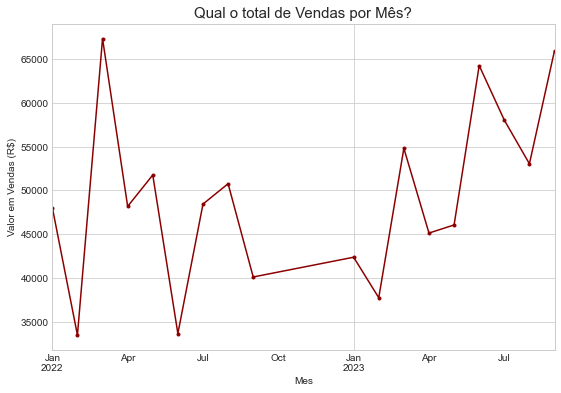

In [41]:
df.groupby("Mes").sum()['ValorTotal'].plot(color="darkred",figsize=(9,6),marker=".")
plt.title("Qual o total de Vendas por Mês?",{'fontsize':15})
plt.ylabel("Valor em Vendas (R$)")
plt.show()

Em 2022 a empresa registrou picos de altos e baixos inconstantes. Entre Setembro de 2022 e Janeiro  de 2023 a empresa não possui o registro dos dados neste Dataset. A partir de março de 2023 é visivel que a empresa entrou em uma crescente de vendas, finalizando o mes de setembro em um dos grandes picos de faturamento.

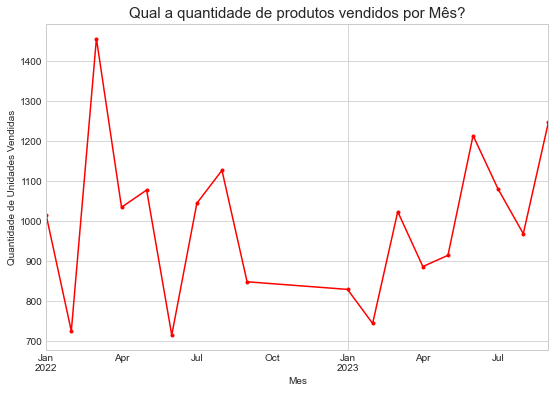

In [42]:
df.groupby("Mes").sum()['UnidadesVendidas'].plot(color="red",figsize=(9,6),marker=".")
plt.title("Qual a quantidade de produtos vendidos por Mês?",{'fontsize':15})
plt.ylabel("Quantidade de Unidades Vendidas")
plt.show()

A quantidade de unidades vendidas acompranha a mesma linha de faturamento.

In [43]:
#Ticker Médio por Mês
df.groupby("Mes").sum()['ValorTotal']/df.groupby("Mes").sum()['UnidadesVendidas']

Mes
2022-01    47.375572
2022-02    46.190160
2022-03    46.279802
2022-04    46.596337
2022-05    48.060906
2022-06    47.075180
2022-07    46.401312
2022-08    45.087508
2022-09    47.310469
2023-01    51.115759
2023-02    50.742200
2023-03    53.573390
2023-04    50.941648
2023-05    50.392099
2023-06    52.971413
2023-07    53.779080
2023-08    54.796767
2023-09    52.942345
Freq: M, dtype: float64

O Ticket médio das vendas vem progressivamente subindo e acompanhando o índice de inflação

A Empresa está atualmente em um bom estado de venda. Cabe uma análise posterior com os dados de Lucratividade

# 5.1 Análise de Produtos

Quais são nossos produtos que geram mais receita e quais são vendidos em mais quantidades? Quais Vendem Menos?

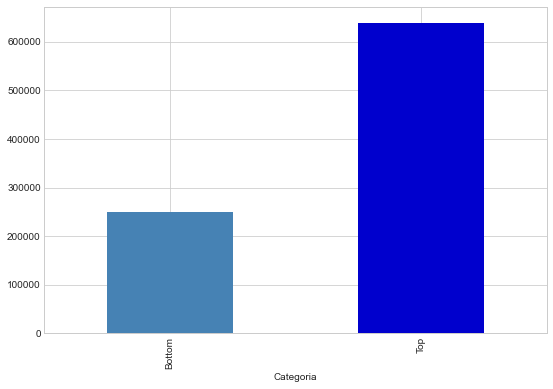

In [44]:
#Valor total em Vendas por Categoria
df.groupby('Categoria').sum()["ValorTotal"].plot.bar(color=['steelblue','mediumblue'],figsize=(9,6))
plt.show()

In [45]:
#Média do valor de vendas por categoria
(df.groupby('Categoria').sum()["ValorTotal"]/df.groupby('Categoria').sum()["UnidadesVendidas"])

Categoria
Bottom    44.682175
Top       51.775288
dtype: float64

In [46]:
#Valor total em Vendas por Produto
v_produtos = df.groupby(["Categoria","Cor","Marca"]).sum()[["ValorTotal","UnidadesVendidas"]].sort_values(ascending=False, by="ValorTotal")

In [47]:
v_produtos["ValorTotal"].values

array([278638.6485, 110438.578 , 101606.629 ,  87576.3985,  75759.521 ,
        70076.1915,  56144.05  ,  53518.2035,  36654.4935,  10528.783 ,
         8270.858 ])

In [48]:
plt.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

<AxesSubplot:xlabel='Categoria'>

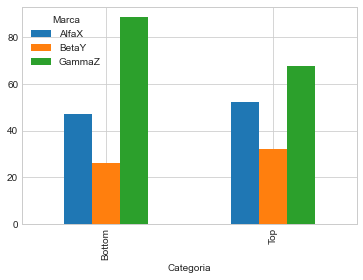

In [49]:
#Valor medio por Produto
(df.groupby(["Categoria","Marca"]).sum()["ValorTotal"]/df.groupby(["Categoria","Marca"]).sum()["UnidadesVendidas"]).unstack().plot.bar()

<AxesSubplot:xlabel='Marca'>

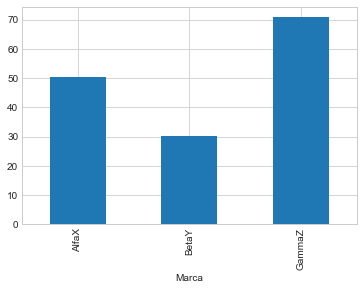

In [50]:
#Valor medio por Marca
(df.groupby("Marca").sum()["ValorTotal"]/df.groupby("Marca").sum()["UnidadesVendidas"]).plot.bar()

<AxesSubplot:xlabel='Marca'>

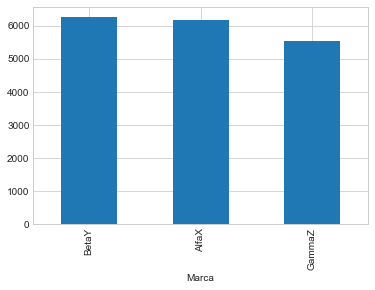

In [51]:
#Quantidade Vendida por Marca
df.groupby("Marca").sum()["UnidadesVendidas"].sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='Marca'>

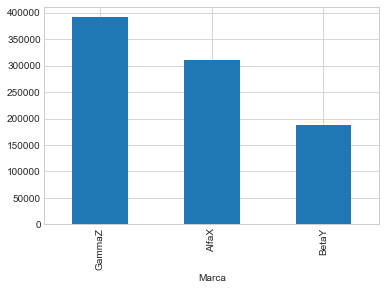

In [52]:
#Total de Vendas por Marca
df.groupby("Marca").sum()["ValorTotal"].sort_values(ascending=False).plot.bar()

    1) A GammaZ Vende produtos com maior Valor Agregado, porém vende menos quantida de produtos. Embora seja a maior geradora de receita. 
    2) A BetaY Vende os produtos com menor Valor Agregado, mas vende em grande quantidade. Porém é a que menos gera receita.
    3) A AlfaX Vende produtos com médio valor agregado e vende em grande quantidade. É a segunda maior geradora de receita.

# 5.2 Análise de Clientes


Qual número de Clientes
Qual a média de gasto por cliente
Quais são os Top Clientes
Quais são os clientes mais frequentes?
Onde Moram os melhores clientes?
Quantidade de unidades clientes
Existe alguma predileção por marca?
Qual classe economica comprou mais com a gente?
Qual a marca preferida por cada classe economica?

In [53]:
#Qual o número de clientes unicos
df["ID_Cliente"].unique().shape

(100,)

In [54]:
#Top 5 clientes que MAIS e Menos compraram no período
df.groupby('ID_Cliente').sum()[['ValorTotal',"UnidadesVendidas"]].sort_values(ascending=False, by="ValorTotal")

,ValorTotal,UnidadesVendidas
ID_Cliente,,
90089,12361.2930,233
90003,11888.4795,215
90027,11486.8415,239
90011,11440.6340,230
90080,11319.8460,208
...,...,...
90064,5729.8475,128
90040,5454.1985,122
90020,5383.3850,103


In [55]:
#Qual a média gasta por cliente
df.groupby('ID_Cliente').mean()['ValorTotal'].sort_values(ascending=False)

ID_Cliente
90069    140.438808
90095    139.114895
90000    135.776603
90024    134.954918
90080    134.760071
            ...    
90036     89.447835
90040     87.970944
90064     84.262463
90083     82.800864
90028     81.123590
Name: ValorTotal, Length: 100, dtype: float64

In [56]:
#Quais são os clientes mais frequentes
df.groupby('ID_Cliente').count()['ID_Trans'].sort_values(ascending=False)

ID_Cliente
90016    100
90096     99
90083     99
90011     98
90089     96
        ... 
90051     58
90010     57
90020     50
90000     39
90099     32
Name: ID_Trans, Length: 100, dtype: int64

In [57]:
#Onde compram os melhores clientes?
df_total = df.groupby(['ID_Cliente']).sum()['ValorTotal']
df_clientes = df.groupby(['ID_Cliente','UF']).sum()['ValorTotal'].sort_values(ascending=False).unstack()
df_clientes["Total"] = df_total
df_clientes.sort_values(ascending=False, by="Total")

UF,AM,BH,MG,RS,SP,Total
ID_Cliente,,,,,,
90089,1222.774,2859.9480,761.8800,1845.5700,5671.1210,12361.2930
90003,897.866,2098.6020,1605.7420,2866.8925,4419.3770,11888.4795
90027,663.861,970.8130,705.8200,3644.0605,5502.2870,11486.8415
90011,349.941,1452.2370,1359.9730,3020.4400,5258.0430,11440.6340
90080,603.900,1983.6530,1248.9965,3465.1050,4018.1915,11319.8460
...,...,...,...,...,...,...
90064,361.930,564.0535,578.8900,1706.9550,2518.0190,5729.8475
90040,111.960,1222.0860,234.9300,1601.4910,2283.7315,5454.1985
90020,327.950,1858.6240,204.9600,770.8520,2220.9990,5383.3850


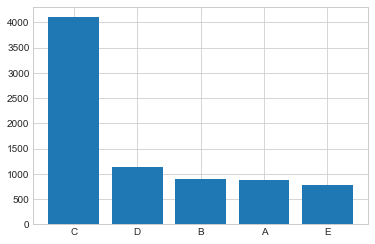

In [58]:
#Qual classe economica compra mais com a gente?
csocial = df.groupby('ClasseSocial').count()['ID_Trans'].sort_values(ascending=False)
plt.bar(csocial.index,csocial.values)
plt.show()

<AxesSubplot:xlabel='ClasseSocial'>

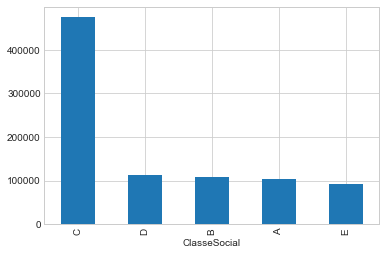

In [59]:
#Qual classe economica gastou mais com a gente?
df.groupby('ClasseSocial').sum()['ValorTotal'].sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='ClasseSocial'>

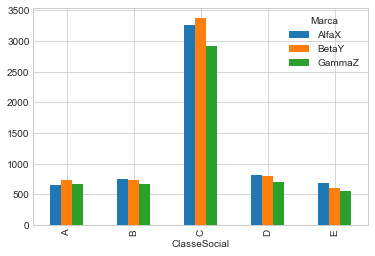

In [60]:
#Qual marca as classes economica preferem?
df.groupby(['ClasseSocial','Marca']).sum()['UnidadesVendidas'].unstack().plot.bar()

<AxesSubplot:xlabel='ClasseSocial'>

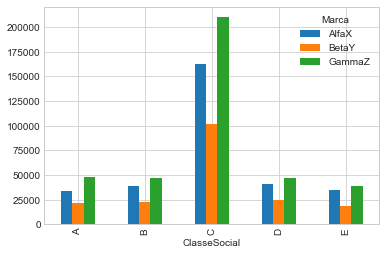

In [61]:
#Qual marca as classes economica preferem?
df.groupby(['ClasseSocial','Marca']).sum()['ValorTotal'].unstack().plot.bar()

In [62]:
#As classes economica preferem promoção?
df_promo = df[df["Promo"]==1]
df_promo.groupby('ClasseSocial').sum()['UnidadesVendidas']


ClasseSocial
A    151
B    165
C    650
D    195
E    135
Name: UnidadesVendidas, dtype: int64

In [63]:
#Qual percentual de unidades vendidas as promoções representam?
df_promo_perct = (df_promo.groupby('ClasseSocial').sum()['UnidadesVendidas'])*100/df.groupby('ClasseSocial').sum()['UnidadesVendidas']
df_promo_perct


ClasseSocial
A    7.312349
B    7.645968
C    6.808421
D    8.379888
E    7.325014
Name: UnidadesVendidas, dtype: float64

<AxesSubplot:xlabel='FaixaIdade'>

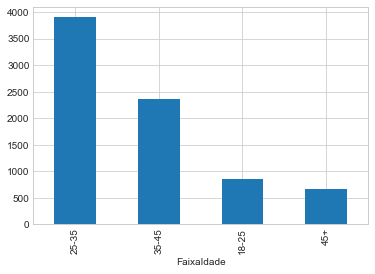

In [64]:
#Qual Faixa etaria compra mais com a gente?
df.groupby('FaixaIdade').count()['ID_Trans'].sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='FaixaIdade'>

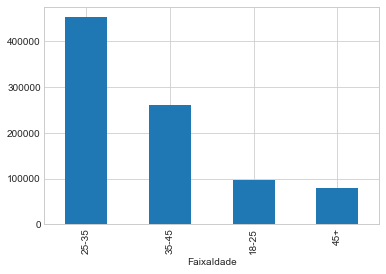

In [65]:
#Qual Faixa etaria compra mais com a gente?
df.groupby('FaixaIdade').sum()['ValorTotal'].sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='FaixaIdade'>

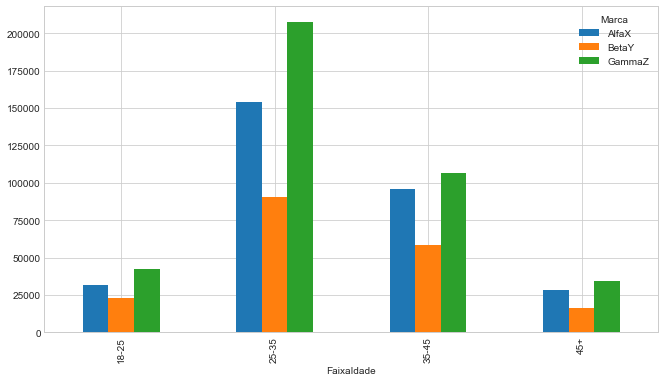

In [66]:
#Qual marca as classes economica preferem?
df.groupby(['FaixaIdade','Marca']).sum()['ValorTotal'].unstack().plot.bar(figsize=(11,6))

<AxesSubplot:xlabel='UF'>

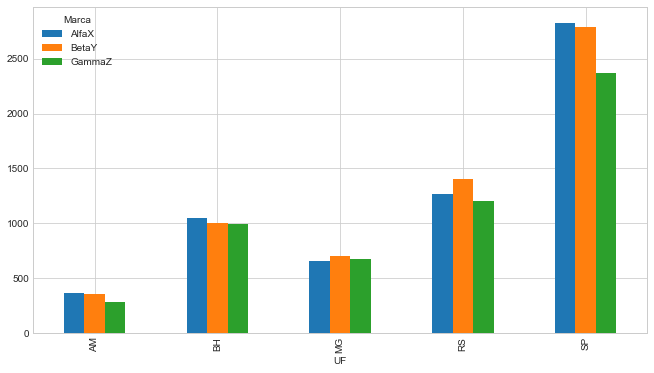

In [67]:
#Qual marca as classes economica preferem?
df.groupby(['UF','Marca']).sum()['UnidadesVendidas'].unstack().plot.bar(figsize=(11,6))

# 5.3 Análise da Campanha GammaZ Top Vermelho

Comparar a venda do Top Vermelho com os outros itens da marca GammaZ
Comparar com os outros Tops que vendemos
Como foi a distribuição de compra da marca no decorrer dos meses

Calcular o percentual de vendas de Tops que foram da GammaZ
Calcular o percentual de vendas que os Tops da GaamaZ representaram


In [68]:
#Comparar a venda do Top Vermelho com os outros itens da marca GammaZ
df_gaamaz= df[df["Marca"]=="GammaZ"]
df_gaamazv= df_gaamaz[df_gaamaz["Cor"]=="Vermelho"]
df_gaamaz.groupby(["Categoria","Cor"]).sum()[['UnidadesVendidas','ValorTotal']]

UnidadesVendidas   ValorTotal
Categoria Cor                                    
Bottom    Azul                   857   75759.5210
Top       Cinza                 1439   36654.4935
          Vermelho              3229  278638.6485

O Top Vermelho é o produto mais vendido da GammaZ, representa mais da metade das vendas da marca.

<AxesSubplot:ylabel='Cor,Marca'>

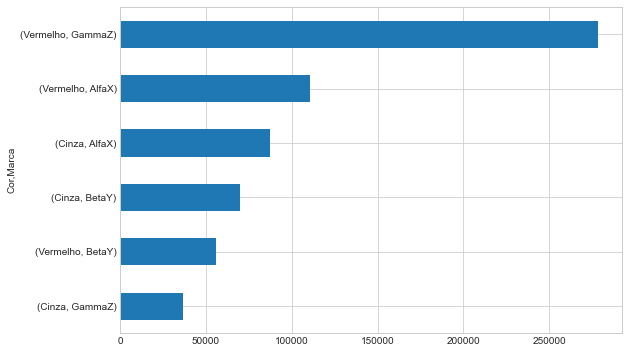

In [69]:
#Comparar com os outros Tops que vendemos
df_top = df[df["Categoria"]=="Top"]
df_top1 = df_top.groupby(["Cor","Marca"]).sum()[['UnidadesVendidas','ValorTotal']].sort_values("ValorTotal")
df_top1["ValorTotal"].plot.barh(figsize=(9,6))



<function matplotlib.pyplot.show(close=None, block=None)>

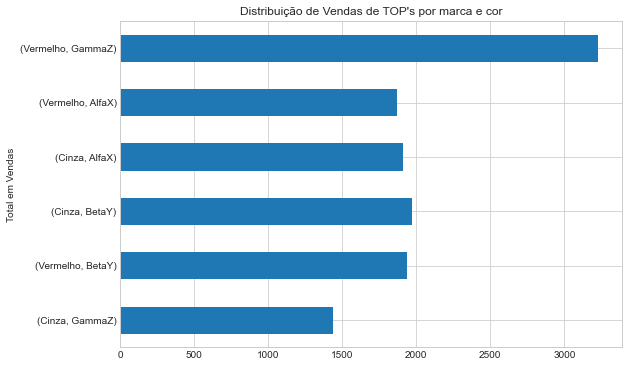

In [70]:
df_top1["UnidadesVendidas"].plot.barh(figsize=(9,6))
plt.title("Distribuição de Vendas de TOP's por marca e cor")
plt.ylabel("Total em Vendas")
plt.show

<AxesSubplot:xlabel='Mes'>

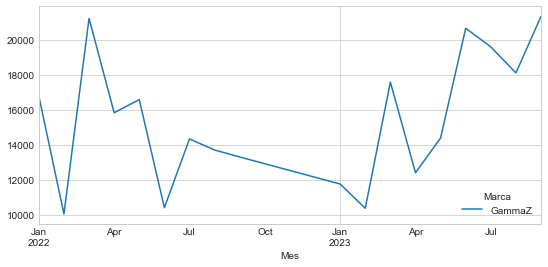

In [71]:
#Como foi a distribuição de compra do TOP VERMELHO GAMMAZ no decorrer dos meses
df_gaamazv.groupby(["Mes","Marca"]).sum()['ValorTotal'].unstack().plot(figsize=(9,4))

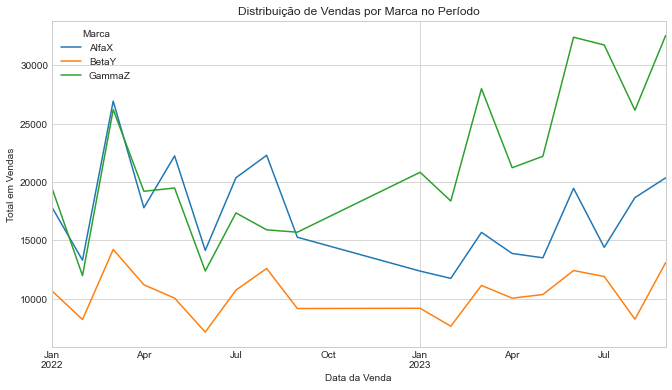

In [72]:
#Como foi a distribuição de compra das diferentes marcas no decorrer dos meses
distribuicao_v = df.groupby(["Mes","Marca"]).sum()['ValorTotal'].unstack().plot(figsize=(11,6))
plt.title("Distribuição de Vendas por Marca no Período")
plt.xlabel("Data da Venda")
plt.ylabel("Total em Vendas")

plt.show()

As campanhas de vendas do Top Vermelho da GammaZ surtiram efeito no ano de 2023 a partir do mes de Março, com queda em Abril e recuperação em Maio


In [73]:
#Com qual frequencia os clientes compram o Top da GammaZ Vermelho
freq_cliente = df.groupby('ID_Cliente').count()['ID_Trans'].sort_values(ascending=False)
freq_cliente1 = df_gaamazv.groupby('ID_Cliente').count()['ID_Trans']
freq_vendas = pd.merge(freq_cliente,freq_cliente1, on="ID_Cliente", how="inner")
freq_vendas.columns=["Total de Pedidos","Pedidos GammaZ Vermelho"]
freq_vendas.head(10)

,Total de Pedidos,Pedidos GammaZ Vermelho
ID_Cliente,,
90016,100,20
90096,99,13
90083,99,17
90011,98,16
90089,96,21
90087,95,21
90027,95,16
90094,93,20
90077,93,19


In [74]:
#Quantas unidades o cliente compra a cada vez que efetua um pedido

In [75]:
scatter_freq = pd.merge(df_total,freq_cliente,on="ID_Cliente", how="inner")
scatter_freq.columns=["TotalPedidos","Frequencia"]

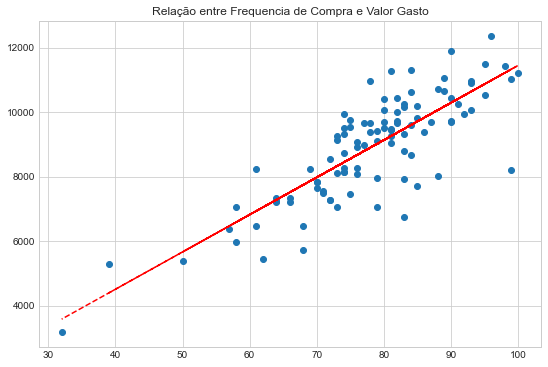

In [76]:
plt.figure(figsize=(9,6))
x = scatter_freq["Frequencia"].values
y = scatter_freq["TotalPedidos"].values
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("Relação entre Frequencia de Compra e Valor Gasto")

plt.show()

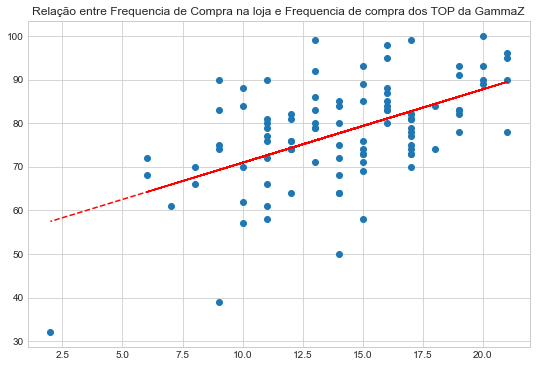

In [77]:
#Relação entre Frequencia de compra e Frequencia de compra do Top GammaZ
plt.figure(figsize=(9,6))
x = freq_vendas['Pedidos GammaZ Vermelho'].values
y = freq_vendas['Total de Pedidos'].values
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("Relação entre Frequencia de Compra na loja e Frequencia de compra dos TOP da GammaZ")

plt.show()

In [78]:
#Comparar as vendas do Ano de 2022 e 2023

<AxesSubplot:xlabel='Mes'>

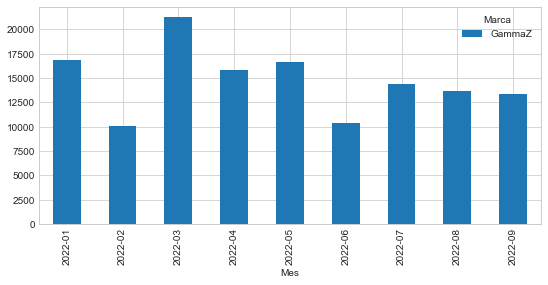

In [79]:
#Como foi a distribuição de compra do TOP VERMELHO GAMMAZ no decorrer dos meses
df_gaamazv2022 = df_gaamazv[df_gaamazv["Ano"]=="2022"]
df_gaamazv2023 = df_gaamazv[df_gaamazv["Ano"]=="2023"]
    
df_gaamazv2022.groupby(["Mes","Marca"]).sum()['ValorTotal'].unstack().plot.bar(figsize=(9,4))

<AxesSubplot:xlabel='Mes'>

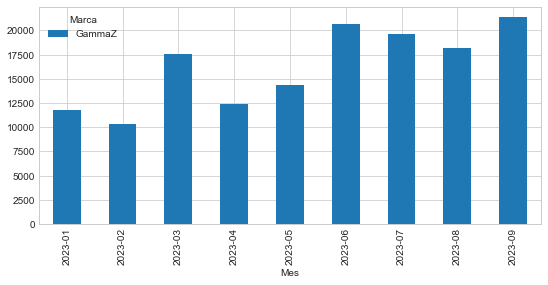

In [80]:
df_gaamazv2023.groupby(["Mes","Marca"]).sum()['ValorTotal'].unstack().plot.bar(figsize=(9,4))

# 5.4 Análise do Cliente

In [81]:
#Top Clientes Lucrativos
lucro_clientes = df.groupby('ID_Cliente').sum()['ValorTotal'].sort_values(ascending=False)

In [82]:
##Análise de Pareto

In [83]:
#Analise para checar se os TOP Clientes são responsável por uma parcela MUITO significativa da receita total do período
#Assim esses clientes tops poderão ser tratados com mais cuidados

In [84]:
#Qual a porcentagem do lucro do TOP 25%
lucro_top_clientes = lucro_clientes[lucro_clientes>=lucro_clientes.quantile(0.75)]

#Total de Lucro que esses clientes geram
lucro_top_clientes = lucro_top_clientes.sum()

#Quanto porcento do lucro total esses clientes geraram?
lucro_porcent=(lucro_top_clientes/df["ValorTotal"].sum())*100

In [85]:
lucro_porcent

30.43817116690769

#### o Top 25% dos clientes é responsável por 30,4% das vendas da empresa. Isso significa que nossa receita está bem distribuida entre os clientes e não temos uma concentração da receita em poucos clientes


In [86]:
#Vamos normalizar o lucro do cliente pelo tempo. O cliente pode ser lucrativo se ele teve mais compras e também se ela já tem mais tempo de base
#devemos considerar o tempo que ele está na base

In [87]:
#Entender a diferença de tempo entre a primeira compra e a ultima data disponível
#Qual foi a Data da primeira compra e a última data disponível
#Calculara a diferença entre as datas 

In [88]:
#Qual foi a Data da primeira compra e a última data disponível
ultima_data = df["Data"].max()
def data_difference(coluna):
    date_difference = ultima_data-coluna
    return date_difference
df['dif_ultima_compra_dias']= df["Data"].apply(lambda x:data_difference(x)).dt.days
df['dif_ultima_compra_meses']= (df['dif_ultima_compra_dias']/30).apply(lambda x: math.floor(x))

In [89]:
#Calcular a Diferença maxima de meses por cliente  = Número de meses que o usuário ficou na base
tempo_de_vida = df.groupby("ID_Cliente").max()['dif_ultima_compra_meses']

C:\Users\Brum\AppData\Local\Temp/ipykernel_10832/1429468501.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  tempo_de_vida = df.groupby("ID_Cliente").max()['dif_ultima_compra_meses']


In [90]:
tempo_de_vida.describe()

count    100.00
mean      20.65
std        0.50
min       19.00
25%       20.00
50%       21.00
75%       21.00
max       21.00
Name: dif_ultima_compra_meses, dtype: float64

In [91]:
#A base tem clientes regulares sem grandes diferenças de tempo de base.
#Vamos então descobrir a média de receita por cliente por mes
lucros_por_mes = (lucro_clientes/tempo_de_vida)

In [92]:
lucros_por_mes

ID_Cliente
90000    264.764375
90001    459.379762
90002    307.734952
90003    594.423975
90004    413.709900
            ...    
90095    536.586024
90096    525.525262
90097    345.054190
90098    509.900119
90099    166.596132
Length: 100, dtype: float64

In [93]:
vendas_por_mes = pd.DataFrame({'ID_Cliente':lucros_por_mes.index, 'Media_Mes':lucros_por_mes.values})
vendas_por_mes = vendas_por_mes.sort_values(ascending=False, by="Media_Mes")


In [94]:
lista_top_clientes = vendas_por_mes["ID_Cliente"]
#Esse arquivo pode ser enviado para o setor de relacionamento. Vamos manter as ofertas especiais e "mimar" esses clientes

In [95]:
#Aqui temos nossa lista de clientes mais lucrativos por mês. Vamos então separar os 50% mais lucrativos e fazer uma análise
#Socio Economica

# 5.4.1 Análise RFM

In [96]:
df

,ID_Trans,Data,Mes,Ano,ID_Produto,Descrição Produto,UnidadesVendidas,ValorTotal,Promo,Categoria,...,Marca,ID_Cliente,Genero,FaixaIdade,ClasseSocial,ID_Loja,UF,Regiao,dif_ultima_compra_dias,dif_ultima_compra_meses
0,1,2022-01-01,2022-01,2022,123005,Top Cinza Marca AlfaX,2,99.98,0.0,Top,...,AlfaX,90023,Masculino,35-45,C,7,RS,SUL,637,21
3892,2,2022-01-01,2022-01,2022,123004,Top Cinza Marca BetaY,1,35.99,0.0,Top,...,BetaY,90092,Masculino,35-45,C,9,BH,NORDESTE,637,21
4034,3,2022-01-01,2022-01,2022,123001,Top Cinza Marca GammaZ,2,51.98,0.0,Top,...,GammaZ,90027,Masculino,25-35,C,1,AM,NORTE,637,21
2335,4,2022-01-01,2022-01,2022,123001,Top Cinza Marca GammaZ,2,51.98,0.0,Top,...,GammaZ,90097,Masculino,45+,C,3,SP,SUDESTE,637,21
1668,5,2022-01-01,2022-01,2022,123004,Top Cinza Marca BetaY,2,71.98,0.0,Top,...,BetaY,90089,Masculino,18-25,C,4,SP,SUDESTE,637,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7330,7787,2023-09-30,2023-09,2023,123002,Bottom Preto Marca BetaY,1,27.99,0.0,Bottom,...,BetaY,90040,Feminino,25-35,D,6,SP,SUDESTE,0,0
4517,7788,2023-09-30,2023-09,2023,123009,Top Marca GammaZ,2,179.98,0.0,Top,...,GammaZ,90027,Masculino,25-35,C,8,RS,SUL,0,0
6726,7789,2023-09-30,2023-09,2023,123006,Bottom Preto Marca AlfaX,2,109.98,0.0,Bottom,...,AlfaX,90033,Feminino,35-45,B,2,MG,CENTRO-OESTE,0,0
781,7790,2023-09-30,2023-09,2023,123010,Bottom GammaZ,2,179.98,0.0,Bottom,...,GammaZ,90038,Feminino,25-35,C,7,RS,SUL,0,0


In [97]:
#Criação da tabela Base 
#1 Coluna de Frequencia
frequencia_compra = df.groupby(['ID_Cliente','ID_Trans']).count().reset_index()[['ID_Cliente','ID_Trans']].groupby('ID_Cliente').count().reset_index()
#2 Coluna de Lucro por cliente
#vendas_por_mes
#3 Coluna de recência
primeira_compra = df.groupby('ID_Cliente').min()["Data"]
ultima_compra =df.groupby('ID_Cliente').max()["Data"]

C:\Users\Brum\AppData\Local\Temp/ipykernel_10832/4237682507.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  primeira_compra = df.groupby('ID_Cliente').min()["Data"]
C:\Users\Brum\AppData\Local\Temp/ipykernel_10832/4237682507.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  ultima_compra =df.groupby('ID_Cliente').max()["Data"]


In [98]:
#Juntar Tabelas
lista_de_tabelas = [primeira_compra,ultima_compra,frequencia_compra,vendas_por_mes,]
tabela_RFM = reduce((lambda left,right: pd.merge(left,right,on=["ID_Cliente"])), lista_de_tabelas)

In [99]:
#Criando a coluna Recencia
tabela_RFM.columns=['ID_Cliente','Primeira_compra','Ultima_compra','N_Pedidos','Compras_Mes']
tabela_RFM['Recencia']=((df['Data'].max())-(tabela_RFM['Ultima_compra'])).dt.days

In [100]:
#Criando a pontuação dos Clientes - Pontuação de 1 a 5 para cada variável, sendo 1 o pior valor e 5 o melhor valor
#Numero de pedido = 1(20% menor) ~ 5(20% maiores)
#Frequencia de pedidos = 1(20% menor) ~ 5(20% maiores)
#Recencia da ultima compra = 1(25% mais distante) ~ 4(25% mais recentes)
r_labels=list(range(4,0,-1))

f_quartiles= pd.qcut(tabela_RFM['N_Pedidos'],5,labels=range(1,6))
m_quartiles= pd.qcut(tabela_RFM['Compras_Mes'],5,labels=range(1,6))
r_quartiles= pd.qcut(tabela_RFM['Recencia'],5,labels=r_labels,duplicates='drop')

In [101]:
tabela_RFM = tabela_RFM.assign(R=r_quartiles)
tabela_RFM = tabela_RFM.assign(F=f_quartiles)
tabela_RFM = tabela_RFM.assign(M=m_quartiles)
tabela_RFM

,ID_Cliente,Primeira_compra,Ultima_compra,N_Pedidos,Compras_Mes,Recencia,R,F,M
0,90000,2022-01-14,2023-09-03,39,264.764375,27,1,1,1
1,90001,2022-01-07,2023-09-20,78,459.379762,10,2,3,3
2,90002,2022-01-07,2023-09-28,68,307.734952,2,4,1,1
3,90003,2022-01-09,2023-09-20,90,594.423975,10,2,5,5
4,90004,2022-01-13,2023-09-30,76,413.709900,0,4,2,3
...,...,...,...,...,...,...,...,...,...
95,90095,2022-01-04,2023-09-28,81,536.586024,2,4,3,5
96,90096,2022-01-04,2023-09-30,99,525.525262,0,4,5,5
97,90097,2022-01-01,2023-09-20,64,345.054190,10,2,1,1
98,90098,2022-01-06,2023-09-27,88,509.900119,3,3,5,5


In [102]:
    segt_map = {
        r'4[4-5][4-5]': "Campeão",
        r'[2-3][4-5][4-5]': "Clientes fiéis",
        r'[3-4][2-3][4-5]': "Fiéis em potencial",
        r'[3-4]1[1-5]': "Novos clientes",
        r'[3-4][2-4][1-3]': "Promessas",
        r'452': "Promessas",
        r'[1-3][3-5][2-3]': "Precisam de Atenção",
        r'35[1-2]': "Precisam de Atenção",
        r'[1-2][1-3][1-2]': "Quase dormentes",
        r'[1-2][1-2][3-5]': "Em risco",
        r'[1-2][3-5][4-5]': "Não pode perder",
        r'[1-2][1-5][1-2]': "Hibernando"
        }

In [103]:
tabela_RFM['Segmento'] = tabela_RFM['R'].astype(str)+tabela_RFM['F'].astype(str)+tabela_RFM['M'].astype(str)
tabela_RFM['Segmento'] = tabela_RFM['Segmento'].replace(segt_map, regex=True)

In [104]:
tabela_RFM['Segmento'].unique()

array(['Quase dormentes', 'Precisam de Atenção', 'Novos clientes',
       'Clientes fiéis', 'Promessas', 'Campeão', 'Em risco',
       'Não pode perder', 'Fiéis em potencial'], dtype=object)

In [105]:
tabela_RFM.groupby('Segmento').count()['ID_Cliente']

Segmento
Campeão                12
Clientes fiéis         16
Em risco                6
Fiéis em potencial      6
Novos clientes         15
Não pode perder         3
Precisam de Atenção     6
Promessas              26
Quase dormentes        10
Name: ID_Cliente, dtype: int64

In [148]:
rfm_resumo = tabela_RFM.groupby("Segmento").count()["ID_Cliente"].sort_values()

In [107]:
tabela_RFM[(tabela_RFM["Segmento"]).isin(["Campeão","Clientes fiéis"])]
lista_top_clientes = (tabela_RFM[(tabela_RFM["Segmento"]).isin(["Campeão","Clientes fiéis"])])
lista_top_clientes = lista_top_clientes["ID_Cliente"].array
lista_top_clientes

<PandasArray>
[90003, 90006, 90008, 90011, 90016, 90023, 90025, 90027, 90029, 90031, 90033,
 90038, 90048, 90049, 90050, 90054, 90055, 90065, 90071, 90076, 90080, 90081,
 90084, 90087, 90089, 90094, 90096, 90098]
Length: 28, dtype: int64

In [108]:
clientes_social = clientes[clientes['ID_Cliente'].isin(lista_top_clientes)]

In [143]:
rfm_genero= clientes_social.groupby('Genero').count()['ID_Cliente']

In [145]:
rfm_idade= clientes_social.groupby('FaixaIdade').count()['ID_Cliente'].sort_values()

In [147]:
rfm_social =clientes_social.groupby('ClasseSocial').count()['ID_Cliente'].sort_values()

# 6. Conclusões e Resultados <a id="cell7"></a>

## Faturamento da empresa no período analisado

In [112]:
507536.08050000004

507536.08050000004

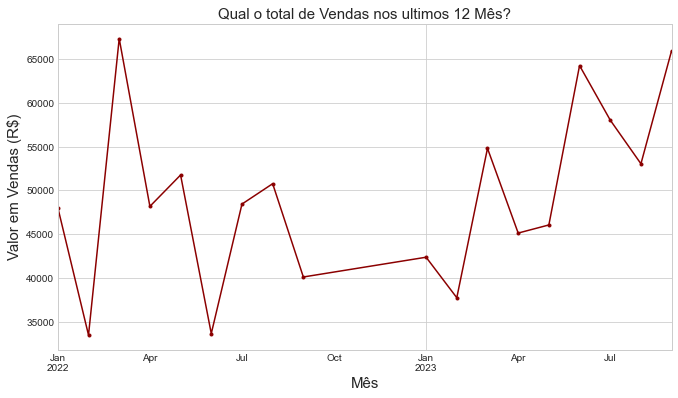

In [113]:
df
df.groupby("Mes").sum()['ValorTotal'].plot(color="darkred",figsize=(11,6),marker=".")
plt.title("Qual o total de Vendas nos ultimos 12 Mês?",{'fontsize':15})
plt.ylabel("Valor em Vendas (R$)",{'fontsize':15})
plt.xlabel("Mês",{'fontsize':15})
plt.show()

In [114]:
df["ValorTotal"].sum()

889212.3545000001

In [115]:
df.groupby('Mes').sum()["ValorTotal"].describe()

count       18.000000
mean     49400.686361
std      10137.187279
min      33487.866000
25%      43064.798500
50%      48311.791000
75%      54365.000750
max      67337.112000
Name: ValorTotal, dtype: float64

#### É possível perceber a linha de tendencia no sentido do crescimento em relação ao faturamento da empresa.
#### No período entre Outubro de 2022 e Janeiro de 2023, não é possível analisar pois a empresa não disponibilizou os registros de vendas entre essas datas.
#### O negócio apresenta-se saudável, porém com leve inconstância nos resultados. 
#### O Valor total faturado no período foi de RS 889.212,35
#### A média de faturamento foi de RS 49400,68 por Mês, tendo um desvio padrão de RS  10137,18

In [116]:
df.groupby('Mes').sum()["UnidadesVendidas"].describe()

count      18.000000
mean      996.666667
std       194.137610
min       715.000000
25%       857.500000
50%      1018.500000
75%      1078.500000
max      1455.000000
Name: UnidadesVendidas, dtype: float64

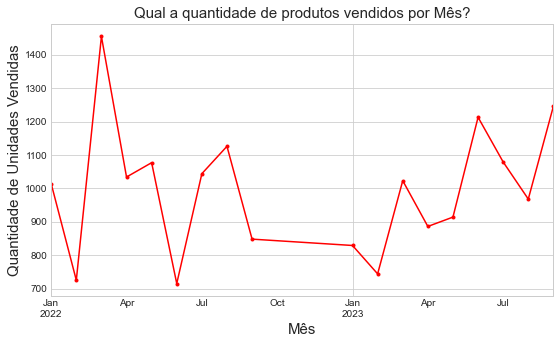

In [117]:
df.groupby("Mes").sum()['UnidadesVendidas'].plot(color="red",figsize=(9,5),marker=".")
plt.title("Qual a quantidade de produtos vendidos por Mês?",{'fontsize':15})
plt.ylabel("Quantidade de Unidades Vendidas",{'fontsize':15})
plt.xlabel("Mês",{'fontsize':15})
plt.show()

#### A Quantidade de unidades vendidas acompanha o faturamento.
#### A média de unidades vendidas foi de 996 por Mês, tendo um desvio padrão de 165 unidades
#### Nos melhores meses vendemos acima de   1078 unidades
#### Nos piores meses vendemos abaixo de 857 unidades

## Número de Clientes

In [118]:
n_clientes = df.groupby(["Mes","ID_Cliente"]).sum().reset_index()


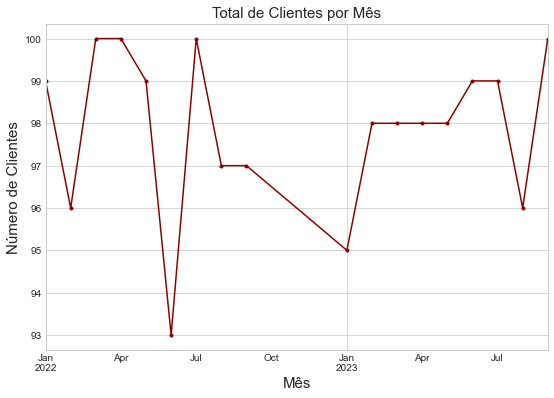

In [119]:
n_clientes[['ID_Cliente','Mes']]
(n_clientes.groupby("Mes")).count()['ID_Cliente'].plot(color="darkred",figsize=(9,6),marker=".")
plt.title("Total de Clientes por Mês",{'fontsize':15})
plt.ylabel("Número de Clientes",{'fontsize':15})
plt.xlabel("Mês",{'fontsize':15})
plt.show()

#### Atualmente nossa base total de clientes é de 100 usuários ativos
#### Temos uma alta frequência de compra de nossos clientes. O Registro mais baixo de clientes em um mês foi de 93. O que representa 93% da base.

## Média de Gasto por Cliente


In [120]:
df.groupby('ID_Cliente').sum()["ValorTotal"].describe()

count      100.000000
mean      8892.123545
std       1662.951151
min       3165.326500
25%       7804.107125
50%       9258.638500
75%      10006.008125
max      12361.293000
Name: ValorTotal, dtype: float64

In [121]:
(df.groupby("Mes").sum()['ValorTotal']/df.groupby("Mes").sum()['UnidadesVendidas']).describe()

count    18.000000
mean     49.535108
std       3.161821
min      45.087508
25%      46.716048
50%      49.226503
75%      52.485699
max      54.796767
dtype: float64

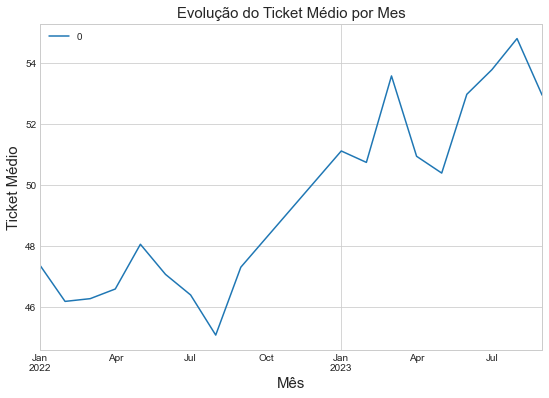

In [122]:
#Ticker Médio por Mês
(df.groupby("Mes").sum()['ValorTotal']/df.groupby("Mes").sum()['UnidadesVendidas']).reset_index().plot(figsize=(9,6),x="Mes")
plt.title("Evolução do Ticket Médio por Mes",{'fontsize':15})
plt.ylabel("Ticket Médio",{'fontsize':15})
plt.xlabel("Mês",{'fontsize':15})
plt.show()

#### O Gráfico apresenta a evolução do Ticker Médio dos clientes no passer dos meses, a média do nosso ticket médio dentro de todo o período foi de RS 49,53
#### A média total de gasto por cliente foi de 8892.12 dentro de todo o período analisado. 

## Total de Vendas por UF

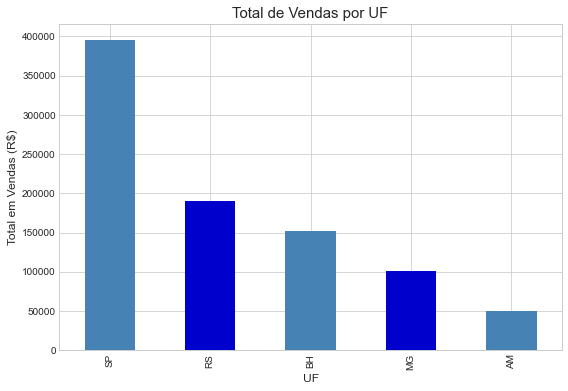

In [123]:
df.groupby('UF').sum()["ValorTotal"].sort_values(ascending=False).plot.bar(color=['steelblue','mediumblue'],figsize=(9,6))
plt.title("Total de Vendas por UF",{'fontsize':15})
plt.ylabel("Total em Vendas (R$)",{'fontsize':12})
plt.xlabel("UF",{'fontsize':12})
plt.show()

### SP é o estado onde mais vendemos. Do segundo ao terceiro lugar (RS e BH) temos uma distribuição balanceada. Os outros dois estados (MG e AM) são os que possuem menor faturamento total no período

# Produtos e Marcas

Text(0.5, 0, 'Marca')

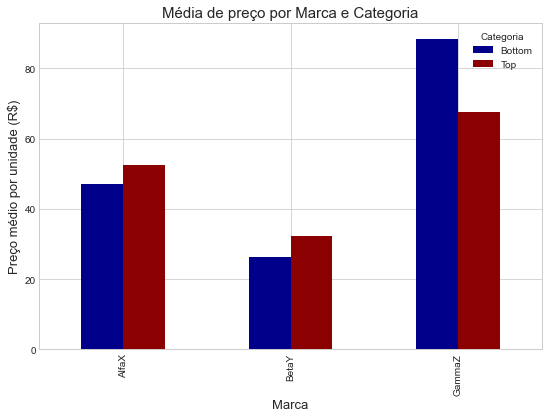

In [172]:
(df.groupby(['Marca','Categoria']).sum()["ValorTotal"]/df.groupby(['Marca','Categoria']).sum()["UnidadesVendidas"]).unstack().plot.bar(figsize=(9,6),color=['darkblue','darkred'])
plt.title("Média de preço por Marca e Categoria",{'fontsize':15})
plt.ylabel("Preço médio por unidade (R$)",{'fontsize':13})
plt.xlabel("Marca",{'fontsize':13})

Text(0.5, 0, 'Marca')

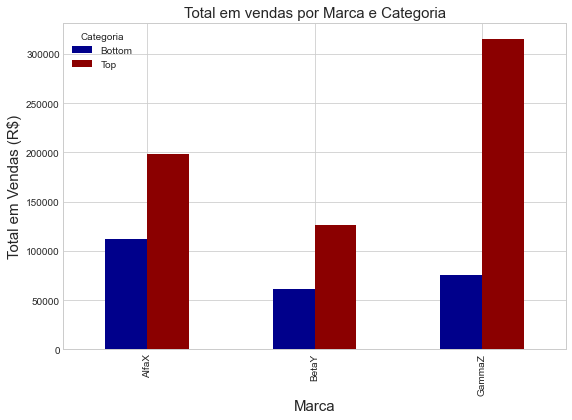

In [125]:
df.groupby(['Marca','Categoria']).sum()['ValorTotal'].unstack().plot.bar(figsize=(9,6),color=['darkblue','darkred'])
plt.title("Total em vendas por Marca e Categoria",{'fontsize':15})
plt.ylabel("Total em Vendas (R$)",{'fontsize':15})
plt.xlabel("Marca",{'fontsize':15})

Text(0.5, 0, 'Marca')

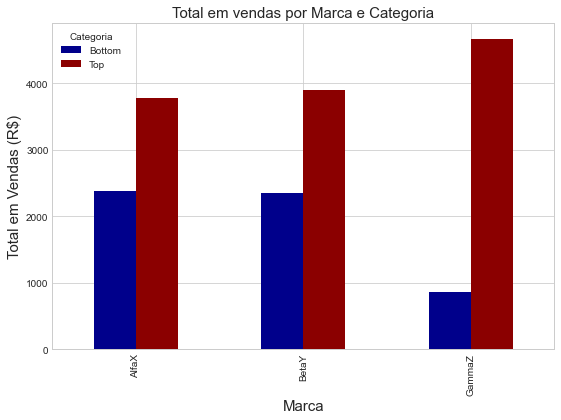

In [176]:
df.groupby(['Marca','Categoria']).sum()['UnidadesVendidas'].unstack().plot.bar(figsize=(9,6),color=['darkblue','darkred'])
plt.title("Total em vendas por Marca e Categoria",{'fontsize':15})
plt.ylabel("Total em Vendas (R$)",{'fontsize':15})
plt.xlabel("Marca",{'fontsize':15})

 O produto campeão de faturamento e de unidades vendidas é o Top da marca GammaZ. <br>
 No início de 2023 este produto passou a ser promovido, afim de aumentar as vendas. Mesmo sendo um produto de alto valor agregado, com a média de preço por unidade maior se comparada as outras marcas, o número de vendas se mostra sólido. <p>
 É Possível afirmar que a campanha de promoções surtiu efeito nos compradores

### Como sugestão ao setor de pricing
Embora a [BetaY] seja a segunda marca mais consumida em Bottom, a representatividade das suas vendas no faturamento é muito baixa. Seria interessante revermos a política de pricing da marca, afim de alavancar nossa receita.
Talvez seja interessante testar um pricing um pouco mais alto, por um tempo limitado, e fazer uma análise comparativa entre a situação atual e a futura. 

## Clientes Compradores

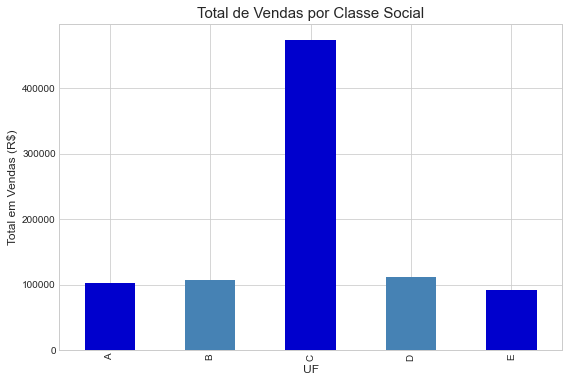

In [127]:
df.groupby('ClasseSocial').sum()["ValorTotal"].plot.bar(color=['mediumblue','steelblue'],figsize=(9,6))
plt.title("Total de Vendas por Classe Social",{'fontsize':15})
plt.ylabel("Total em Vendas (R$)",{'fontsize':12})
plt.xlabel("UF",{'fontsize':12})
plt.show()

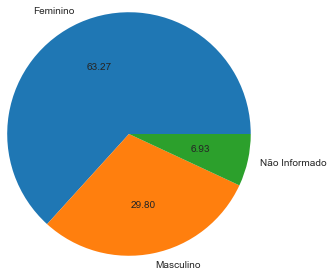

In [138]:
plt.pie(df.groupby('Genero').count()["ID_Cliente"], labels=df.groupby('Genero').count()["ID_Cliente"].index, radius=1.4, autopct="%.2f")
plt.show()

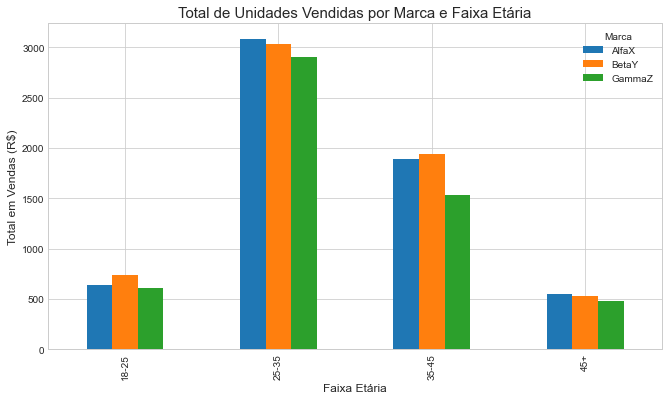

In [173]:
#Qual marca as classes economica preferem?
df.groupby(['FaixaIdade','Marca']).sum()['UnidadesVendidas'].unstack().plot.bar(figsize=(11,6))
plt.title("Total de Unidades Vendidas por Marca e Faixa Etária",{'fontsize':15})
plt.ylabel("Total em Vendas (R$)",{'fontsize':12})
plt.xlabel("Faixa Etária",{'fontsize':12})
plt.show()

 A maioria do nosso público comprador é do sexo feminino, está situado na classe econômica C e tem de 25 a 45 anos. Eles possuem preferência pela marca AlfaX

# Melhores Clientes

 Pensando em futuras campanhas de promoção e marketing, analisamos os melhores clientes através de uma pontuação de RFM (Recência, Frequencia e Monetário)<p>
 Essa análise é capaz de criar uma pontuação para cada cliente, onde podemos identificar níveis de atenção de cada um.

*Campeões*: compraram recentemente, compram com frequência e gastam mais. <br>
*Clientes fiéis*: gastam bem e com boa frequência. São responsivos a promoções.<br>
*FIéis em potencial*: clientes recentes, mas que gastaram um bom dinheiro e já compraram mais de uma vez.<br>
*Novos clientes*: compraram recentemente, mas não com frequência. <br>
*Promessas:* compradores recentes, mas que não gastaram muito.<br>
*Clientes precisando de atenção:* recência, frequência e valor monetário acima da curva, mas podem não ter comprado tão recentemente assim.<br>
*Quase dormentes:* recência, frequência e valor monetário abaixo da média. Tendem a se perder se não forem reativados.<br>
*Em risco:* gastaram bastante dinheiro e compraram com frequência, mas já há bastante tempo. Precisam retornar à base de clientes.<br>
*Não pode perder:* fizeram compras grandes e frequentes, mas não voltaram por muito tempo.<br>
*Hibernando:* a última compra foi há muito tempo. Gastam pouco e fazem poucos pedidos.<br>

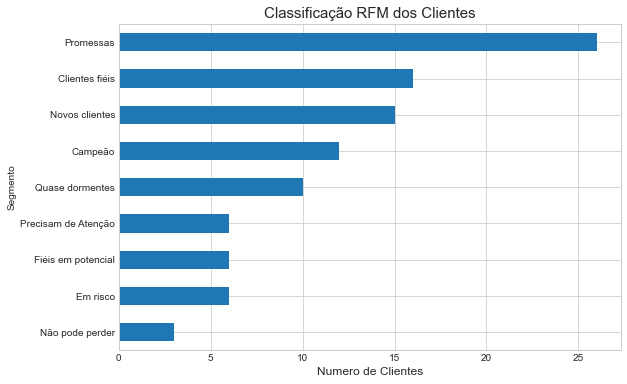

In [157]:
rfm_resumo.plot.barh(figsize=(9,6))
plt.title("Classificação RFM dos Clientes",{'fontsize':15})
plt.xlabel("Numero de Clientes",{'fontsize':12})
plt.show()

Considerando que os dois melhores clientes que podemos ter são : Campeões e Clientes Fiéis. Temos então um cliente ideal para se tornar referência de persona para as próximas campanhas de marketing.

<AxesSubplot:xlabel='FaixaIdade'>

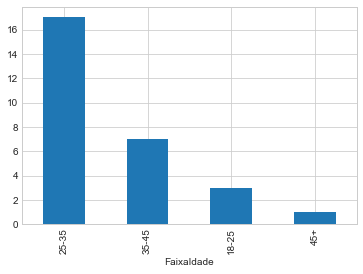

In [160]:
rfm_idade.sort_values(ascending=False).plot.bar()

A Faixa etária do cliente ideal é similar a maioria dos nossos clientes compradores. Entre 25 a 45 anos.

<AxesSubplot:ylabel='ID_Cliente'>

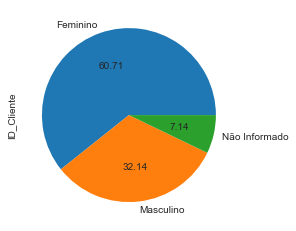

In [165]:
rfm_genero.sort_values(ascending=False).plot.pie(autopct='%.2f')

Em sexo podemos afirmar que majoritariamente esses clientes são mulheres também.

<AxesSubplot:xlabel='ClasseSocial'>

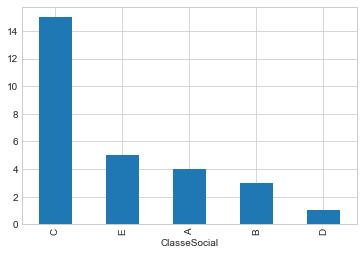

In [169]:
rfm_social.sort_values(ascending=False).plot.bar()

Em relação a classe social, também temos a Classe C com maior destaque.

Por fim, se o intuito das campanhas for de aumentar o faturamento, é sugerido que se mantenha o enfoque nos clientes do Sexo Feminino, integrantes da classe C e com idade entre 25-45 anos.

Temos então as seguintes sugestões : através do valor do nosso cliente classificado pela análise RFM, podemor criar uma lista de melhores clientes e produzindo um público Look-a-like para uma campanha com detalhamento de público mais assertivo. 
A partir de dados demográficos, atingir o público descrito anteriormente, através de uma comunicação mais assertiva.
